## Observations and Insights 

In [1]:
#Observations and Insights

#1. Out of the top four most successful treatment regimens, mice being treated with Capomulin, or Ramican saw the greatest decrease in the size of their tumors.

#2. At the 35 day mark is when mice being treated with Capomulin saw the greatest reduction in the size of their tumor. Shortly thereafter begins to gradually increase in size.

#3. The correlation between mouse weight and average tumor volume, regarding the mice treated with capomulin, is 0.84. The coefficient of 0.84 implies the the dependent variable, mouse weight, does in fact increase when the independent variable, average tumor volume, is increasing.




In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on=("Mouse ID"))
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice in the DataFrame.
a = combined_df["Mouse ID"].unique()
len(a)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df["Mouse ID"].value_counts()

g989    13
l897    10
q511    10
n304    10
r604    10
        ..
x336     1
l872     1
x226     1
n482     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df.set_index("Mouse ID", inplace=True)
combined_df.drop("g989", inplace=True)
combined_df.reset_index(inplace=True)

In [7]:
# Checking the number of mice in the clean DataFrame.
a = combined_df["Mouse ID"].unique()
len(a)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = combined_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = combined_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = combined_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation = combined_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = combined_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_statistics_table = pd.DataFrame([mean,median,variance,standard_deviation,SEM])
summary_statistics_table

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Tumor Volume (mm3),40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.320930,40.216745,54.233149,53.236507
Tumor Volume (mm3),41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.446266,40.673236,52.431737,51.818479
Tumor Volume (mm3),24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.852013,23.486704,59.450562,48.533355
Tumor Volume (mm3),4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.622085,4.846308,7.710419,6.966589
Tumor Volume (mm3),0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.544332,0.320955,0.573111,0.516398


In [9]:
summary_statistics_table.insert(0,"=", ["Mean", "Median","Variance","Standard Deviation","SEM"], True)
summary_statistics_table


Drug Regimen,=,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Tumor Volume (mm3),Mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.320930,40.216745,54.233149,53.236507
Tumor Volume (mm3),Median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.446266,40.673236,52.431737,51.818479
Tumor Volume (mm3),Variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.852013,23.486704,59.450562,48.533355
Tumor Volume (mm3),Standard Deviation,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.622085,4.846308,7.710419,6.966589
Tumor Volume (mm3),SEM,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.544332,0.320955,0.573111,0.516398


## Bar Plots

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_per_time_point = pd.DataFrame(combined_df.groupby(["Drug Regimen","Timepoint"])["Mouse ID"].count())
mice_per_time_point = mice_per_time_point.rename(columns={"Mouse ID":"Mice Per Time Point"})
mice_per_time_point = mice_per_time_point.reset_index()
mice_per_time_point


,Drug Regimen,Timepoint,Mice Per Time Point
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


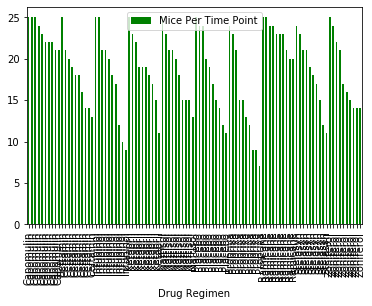

In [11]:
mice_per_time_point.plot(kind="bar",x="Drug Regimen",y="Mice Per Time Point", color="green")                        

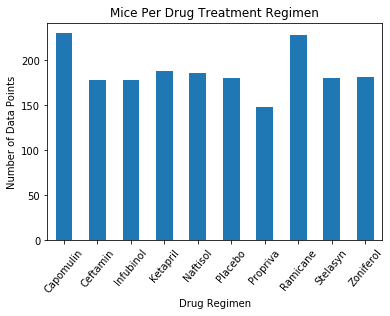

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


drug_reg_tumor_vol = combined_df.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
pyplot_bar = pd.DataFrame(drug_reg_tumor_vol)

also = pyplot_bar.plot.bar(legend=False,rot=50)
also
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Mice Per Drug Treatment Regimen")
plt.savefig("pyplot_bar")

## Pie Plots

In [13]:
combined_df["Sex"].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["orange", "lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0.1)

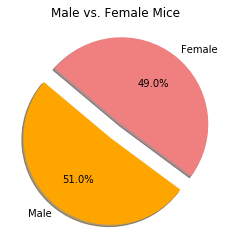

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs. Female Mice")
plt.savefig("male_vs_female_pie")

In [16]:
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin", :]


In [17]:
## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [19]:
capomulin_final_df = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_final_volume = pd.DataFrame(capomulin_final_df)
capomulin_final_combined = pd.merge(capomulin_final_volume, combined_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_final_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [20]:
ramicane_final_df = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_final_volume = pd.DataFrame(ramicane_final_df)
ramicane_final_combined = pd.merge(ramicane_final_volume, combined_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_final_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [21]:
infubinol_final_df = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_final_volume = pd.DataFrame(infubinol_final_df)
infubinol_final_combined = pd.merge(infubinol_final_volume, combined_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_final_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [22]:
ceftamin_final_df = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_final_volume = pd.DataFrame(ceftamin_final_df)
ceftamin_final_combined = pd.merge(ceftamin_final_volume, combined_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_final_combined.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [23]:
tumors_capomulin = capomulin_final_combined["Tumor Volume (mm3)"]

quartiles = tumors_capomulin.quantile([.25,.5,.75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
iqr = upper_quartile - lower_quartile

lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"The outliers, regarding Capomulin, are all the tumors with a volume < {lower_bound}) and > {upper_bound}")

The outliers, regarding Capomulin, are all the tumors with a volume < 20.70456164999999) and > 51.83201549


In [24]:
tumors_ramicane = ramicane_final_combined["Tumor Volume (mm3)"]

quartiles = tumors_ramicane.quantile([.25,.5,.75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
iqr = upper_quartile - lower_quartile

lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"The outliers, regarding Ramicane, are all the tumors with a volume < {lower_bound}) and > {upper_bound}")

The outliers, regarding Ramicane, are all the tumors with a volume < 17.912664470000003) and > 54.30681135


In [25]:
tumors_infubinol = infubinol_final_combined["Tumor Volume (mm3)"]

quartiles = tumors_infubinol.quantile([.25,.5,.75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
iqr = upper_quartile - lower_quartile

lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"The outliers, regarding Infubinol, are all the tumors with a volume < {lower_bound}) and > {upper_bound}")

The outliers, regarding Infubinol, are all the tumors with a volume < 36.83290494999999) and > 82.74144559000001


In [26]:
tumors_ceftamin = ceftamin_final_combined["Tumor Volume (mm3)"]

quartiles = tumors_ceftamin.quantile([.25,.5,.75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
iqr = upper_quartile - lower_quartile

lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"The outliers, regarding Ceftamin, are all the tumors with a volume < {lower_bound}) and > {upper_bound}")

The outliers, regarding Ceftamin, are all the tumors with a volume < 25.355449580000002) and > 87.66645829999999


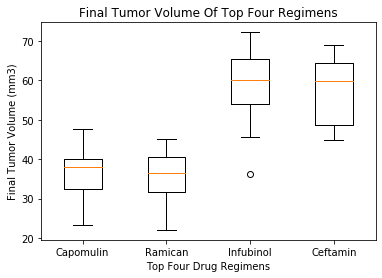

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_tumor_volume_box_plot = [tumors_capomulin,tumors_ramicane,tumors_infubinol,tumors_ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Of Top Four Regimens")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Top Four Drug Regimens")

ax1.boxplot(final_tumor_volume_box_plot, labels=["Capomulin","Ramican","Infubinol","Ceftamin"])

plt.savefig("box_plot_final_tumor_volume")
plt.show()

## Line and Scatter Plots

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
b128_capomulin_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128",:]
b128_capomulin_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


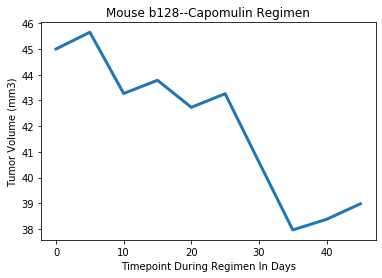

In [29]:
x_axis_time_point = b128_capomulin_df["Timepoint"]
volume_of_tumor = b128_capomulin_df["Tumor Volume (mm3)"]

plt.title("Mouse b128--Capomulin Regimen")
plt.plot(x_axis_time_point, volume_of_tumor, linewidth=3, markersize= 14)
plt.xlabel("Timepoint During Regimen In Days")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig("capomulin_line_plot")
plt.show()


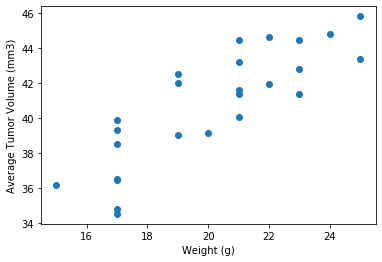

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_average_tumor_scatter = capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_average_tumor_scatter["Weight (g)"],capomulin_average_tumor_scatter["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("scatterplot")
plt.show()


## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient = round(st.pearsonr(capomulin_average_tumor_scatter["Weight (g)"],capomulin_average_tumor_scatter["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume, regarding the mice treated with capomulin, is {correlation_coefficient}")

The correlation between mouse weight and average tumor volume, regarding the mice treated with capomulin, is 0.84


In [32]:
linear_regression_values = st.linregress(capomulin_average_tumor_scatter["Weight (g)"],capomulin_average_tumor_scatter ["Tumor Volume (mm3)"])
print(f"Here is the {linear_regression_values}")

Here is the LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)


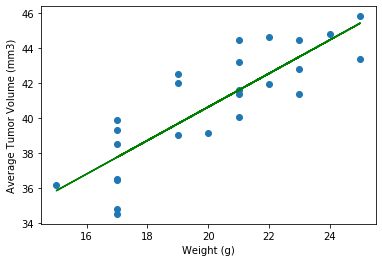

In [33]:
capomulin_slope = 0.9544396890241045
capomulin_intercept = 21.552160532685015
capomulin_y_values = capomulin_average_tumor_scatter["Weight (g)"]*capomulin_slope+capomulin_intercept
plt.scatter(capomulin_average_tumor_scatter["Weight (g)"],capomulin_average_tumor_scatter["Tumor Volume (mm3)"])
plt.plot(capomulin_average_tumor_scatter["Weight (g)"],capomulin_y_values,color="green")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("capomulin_linear_regression")
plt.show()